<a href="https://colab.research.google.com/github/lvisdd/object_detection_tutorial/blob/master/tf_pose_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# restart (or reset) your virtual machine
#!kill -9 -1

# [tf-pose-estimation](https://github.com/ildoonet/tf-pose-estimation)

## Install

In [2]:
!git clone https://www.github.com/ildoonet/tf-pose-estimation

Cloning into 'tf-pose-estimation'...
remote: Enumerating objects: 1362, done.
remote: Total 1362 (delta 0), reused 0 (delta 0), pack-reused 1362
Receiving objects: 100% (1362/1362), 94.13 MiB | 18.61 MiB/s, done.
Resolving deltas: 100% (729/729), done.


In [3]:
%cd tf-pose-estimation

/content/tf-pose-estimation


In [4]:
!pip install -r requirements.txt

  Cloning https://github.com/ppwwyyxx/tensorpack.git to /tmp/pip-req-build-j403zzbx
  Running command git clone -q https://github.com/ppwwyyxx/tensorpack.git /tmp/pip-req-build-j403zzbx
     |████████████████████████████████| 81kB 28.9MB/s 
  Created wheel for fire: filename=fire-0.2.1-py2.py3-none-any.whl size=103527 sha256=df98fdf794e01a89dbbee3adb8a57568c3dfa40c93595971ca8b63d83e7b156a
  Stored in directory: /root/.cache/pip/wheels/31/9c/c0/07b6dc7faf1844bb4688f46b569efe6cafaa2179c95db821da
  Created wheel for tensorpack: filename=tensorpack-0.9.7.1-py2.py3-none-any.whl size=288298 sha256=63280ffcfd129a751824609674e581d21fe9502b8f2af85b77f94680213fed4f
  Stored in directory: /tmp/pip-ephem-wheel-cache-6zsrfjhw/wheels/a8/b5/a9/025b3a1294b9ffff93309e6956c65aa80e0fa40821d29eff1e
Successfully built fire tensorpack
ERROR: tensorpack 0.9.7.1 has requirement tqdm>4.29.0, but you'll have tqdm 4.28.1 which is incompatible.


In [5]:
%cd tf_pose/pafprocess

/content/tf-pose-estimation/tf_pose/pafprocess


In [6]:
!apt-get -q -y install swig

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 8 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 2s (452 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpacking swig (3.0.12-1)

In [7]:
!swig -python -c++ pafprocess.i && python setup.py build_ext --inplace

running build_ext
building '_pafprocess' extension
swigging pafprocess.i to pafprocess_wrap.cpp
swig -python -c++ -o pafprocess_wrap.cpp pafprocess.i
creating build
creating build/temp.linux-x86_64-3.6
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I. -I/usr/include/python3.6m -c pafprocess.cpp -o build/temp.linux-x86_64-3.6/pafprocess.o
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I. -I/usr/include/python3.6m -c pafprocess_wrap.cpp -o build/temp.linux-x86_64-3.6/pafprocess_wrap.o
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protecto

## Download Tensorflow Graph File(pb file)

In [8]:
%cd /content/tf-pose-estimation

/content/tf-pose-estimation


In [9]:
%cd models/graph/cmu

/content/tf-pose-estimation/models/graph/cmu


In [10]:
!bash download.sh

[download] model graph : cmu
--2019-08-28 17:07:28--  http://download686.mediafire.com/v3b42aqx2b1g/qlzzr20mpocnpa3/graph_opt.pb
Resolving download686.mediafire.com (download686.mediafire.com)... 205.196.120.134
Connecting to download686.mediafire.com (download686.mediafire.com)|205.196.120.134|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209299198 (200M) [application/octet-stream]
Saving to: ‘/content/tf-pose-estimation/models/graph/cmu/graph_opt.pb’

/content/tf-pose-es 100%[===================>] 199.60M  1.40MB/s    in 2m 26s  

2019-08-28 17:09:54 (1.37 MB/s) - ‘/content/tf-pose-estimation/models/graph/cmu/graph_opt.pb’ saved [209299198/209299198]

[download] end


## Test Inference

In [11]:
%cd /content/tf-pose-estimation

/content/tf-pose-estimation


W0828 17:09:57.120412 139649680385920 deprecation_wrapper.py:119] From /content/tf-pose-estimation/tf_pose/mobilenet/mobilenet.py:369: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

[2019-08-28 17:09:57,126] [TfPoseEstimator] [INFO] loading graph from /content/tf-pose-estimation/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)
I0828 17:09:57.126258 139649680385920 estimator.py:310] loading graph from /content/tf-pose-estimation/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)
W0828 17:09:57.127575 139649680385920 deprecation_wrapper.py:119] From /content/tf-pose-estimation/tf_pose/estimator.py:311: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

W0828 17:09:57.128260 139649680385920 deprecation_wrapper.py:119] From /content/tf-pose-estimation/tf_pose/estimator.py:312: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.

W0828 17:09:57.149183 139649680385920 deprecation_wrap

TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D_bn_offset
TfPoseEstimator/M

[2019-08-28 17:10:00,468] [TfPoseEstimatorRun] [INFO] inference image: ./images/p1.jpg in 0.0228 seconds.
I0828 17:10:00.468498 139649680385920 run.py:51] inference image: ./images/p1.jpg in 0.0228 seconds.


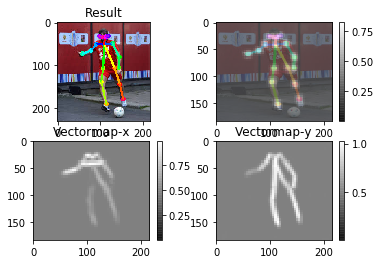

In [12]:
%run -i run.py --model=mobilenet_thin --resize=432x368 --image=./images/p1.jpg